In [3]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable,vstack
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
from scipy import stats
from astropy import units as u
import random

# HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies_OLD.fits')
# HSC_G09_gals.info()
# HSC_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies_OLD.fits')
# HSC_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies_OLD.fits')

# store old data just in case
# HSC_G09_gals.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_HSC_galaxies_OLD.fits')
# HSC_G12_gals.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_HSC_galaxies_OLD.fits')
# HSC_G15_gals.write('/import/silo5/fscu5535/HSC_work/mod_data/G15_HSC_galaxies_OLD.fits')

In [5]:
# loop through each field, if dec is correct AND REDSHIFT then store the object_id. then do a left join.

goodg09 = []
goodg12 = []
goodg15 = []

HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies_OLD.fits')
for i in range(len(HSC_G09_gals)):
    if HSC_G09_gals['dec'][i] >= -2.3 and HSC_G09_gals['photoz_median'][i] <= 0.125:
        goodg09.append(HSC_G09_gals['object_id'][i])
        
#HSC_G09_gals = 0
print("g09 done",len(goodg09))

HSC_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies_OLD.fits')
for i in range(len(HSC_G12_gals)):
    if HSC_G12_gals['dec'][i] >= -2.3 and HSC_G12_gals['photoz_median'][i] <= 0.125:
        goodg12.append(HSC_G12_gals['object_id'][i])
        
#HSC_G12_gals = 0
print("g12 done",len(goodg12))

HSC_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies_OLD.fits')
for i in range(len(HSC_G15_gals)):
    if 2.15 >= HSC_G15_gals['dec'][i] >= -2.3 and HSC_G15_gals['photoz_median'][i] <= 0.125:
        goodg15.append(HSC_G15_gals['object_id'][i])

#HSC_G15_gals = 0
print("g15 done",len(goodg15))

g09 = Table()
g09['object_id'] = goodg09
goodg09 = 0
g09 = join(g09,HSC_G09_gals,keys="object_id",join_type="left")
g09.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits',overwrite=True)
print("g09 written to file")

g12 = Table()
g12['object_id'] = goodg12
goodg12 = 0
g12 = join(g12,HSC_G12_gals,keys="object_id",join_type="left")
g12.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits',overwrite=True)
print("g12 written to file")

g15 = Table()
g15['object_id'] = goodg15
goodg15 = 0
g15 = join(g15,HSC_G15_gals,keys="object_id",join_type="left")
g15.write('/import/silo5/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits',overwrite=True)
print("g15 written to file")


g09 done 48374
g12 done 50084
g15 done 47525
g09 written to file
g12 written to file
g15 written to file


Text(0.5, 1.0, 'G15')

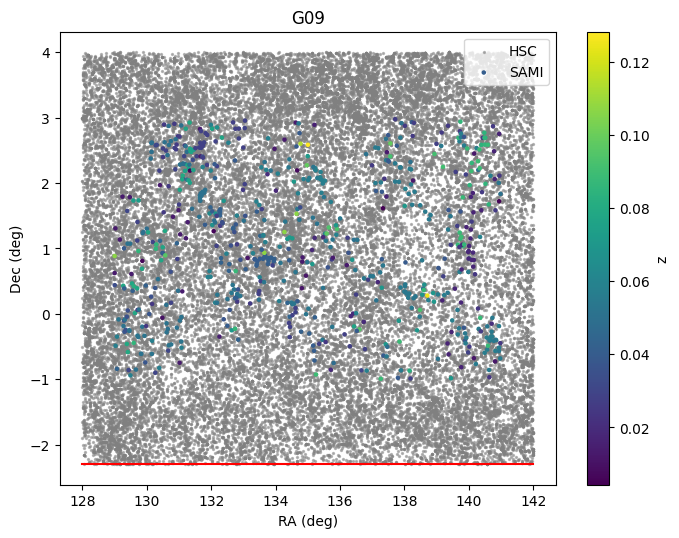

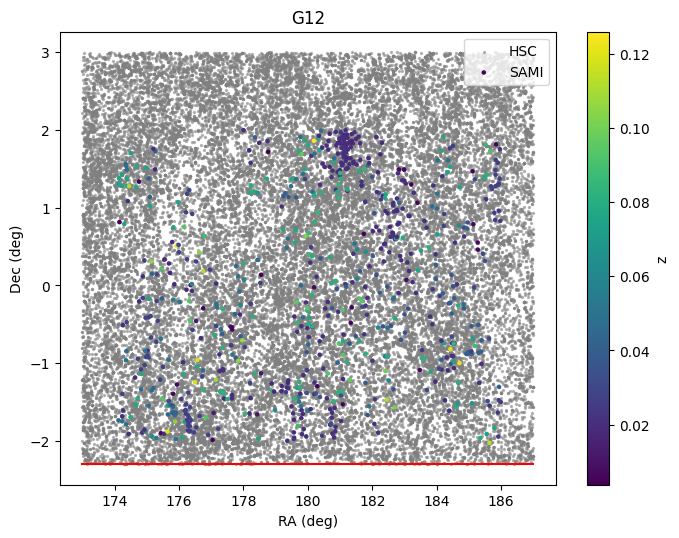

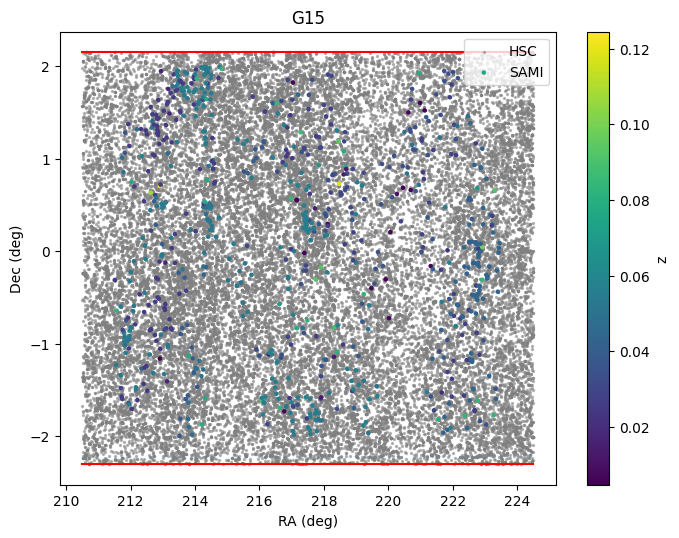

In [6]:
HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
HSC_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
HSC_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')

SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
SAMI_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_sami_1.0.fits')
SAMI_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G09_gals['ra'],HSC_G09_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G09_gals['RA'],SAMI_G09_gals['DEC'],label="SAMI",c=SAMI_G09_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((128,142),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G09")

# filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG09.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G12_gals['ra'],HSC_G12_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G12_gals['RA'],SAMI_G12_gals['DEC'],label="SAMI",c=SAMI_G12_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((173,187),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G12")

# filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG12.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G15_gals['ra'],HSC_G15_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G15_gals['RA'],SAMI_G15_gals['DEC'],label="SAMI",c=SAMI_G15_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((210.5,224.5),(2.15,2.15),c='r')
plt.plot((210.5,224.5),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G15")

# filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG15.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

